In [39]:
from openai import OpenAI
from pathlib import Path
import json
import re
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

### Introduction
The following notebook aids the post-processing of the generated results from the BERTnet framework. <br> These step use the GPT-4 model to filter out the results. GPT-3.5 can also be used, for that the model name has to be changed. Please add your OpenAI API key to run the steps.  Add other instuctions for the relations if needed. <br>
<br>
The notebook is broken down into the following parts: <br>
- the instructions are defined and the full list of results is opened <br>
- the data is broken down to smaller batches to ensure more accurate filteration results. <br>
- each batch is processed and the final results are saved to a json. <br>
- the filtered entities and their relation name are then converted to a dataframe, which can then be visualized as a KG.

In [ ]:
api_key = "" # add your API key


In [28]:
illnessRecomendation_instruction = "you are a medical assistant. The task is to filter out the nested list. In the nested list, each list contains two entities. Entity one is a treatment or a medication and entity 2 is a disease name. Iterate through the list and if entity 1 can be recommended for illness entity 2 then keep it in the list and if not then remove it from the list. return the filtered list in a json. First return the correct pairs, then the brief explanation as to why they are valid."
hasMedication_instruction        = "you are a medical assistant. The task is to filter out the nested list. In the nested list, each list contains two entities. Entity one is a disease name and entity 2 is a medication name. Iterate through the list and if entity 2 can be used as medication or is part of treatment for disease entity 1 then keep it in the list and if not then remove it from the list. return the filtered list in a json. First return the correct pairs, then the brief explanation as to why they are valid. only keep valid medication-disease pairs"
hasRiskFactor                    = "you are a medical assistant. The task is to filter out the nested list. In the nested list, each list contains two entities. Entity one is a disease name and entity 2 is a riisk factor. Iterate through the list and if entity 2 can be a risk factor for disease entity 1 then keep it in the list and if not then remove it from the list. return the filtered list in a json. only keep valid risk factor-disease pairs. First return the correct pairs, then the brief explanation as to why they are valid."
hasSideEffect                    = "you are a medical assistant. The task is to filter out the nested list. Entity 1 is a medication and entiity 2 is a side effect. Go through the list and if entity 2 can be a side effect for entity 1 then keep in the list, if not then remove it.  keep only valid side effect-medication pairs and return the results in a filtered list in a json. First return the correct pairs, then the brief explanation as to why they are valid."
isSymptomOf                      = "you are a medical assistant. The task is to filter out the nested list. Entity 1 is a symptom and entity 2 is a disease. Go through the list and if entity 1 can be a symptom for entity 2 then keep in the list, if not then remove it.  keep only valid symptom-disease pairs and return the results in a filtered list in a json. First return the correct pairs, then the brief explanation as to why they are valid."
hasDrugForm                      = "you are a medical assistant. The task is to filter out the nested list. Entity 1 is a medication and entiity 2 is a drug form. Go through the list and if entity 2 can be a drug form for entity 1 then keep in the list, if not then remove it.  keep only valid drug form-medication pairs and return the results in a filtered list in a json. First return the correct pairs, then the brief explanation as to why they are valid."


In [7]:
bertnet_output_path = "medbert-onco-cardio-logical.json"
with open(bertnet_output_path, "r") as fp:
    data = json.load(fp)

converted_data = [item[0] for item in data]
# print(len(converted_data)) 
print(converted_data[:5])

[['ÜBelkeit', 'paracetamol'], ['herzrhythmusstörungen', 'ass'], ['Vhf', 'ass'], ['Dorsal', 'diskus'], ['schlaganfall', 'ass']]


In [8]:
batch_size = 50

# Break the nested list into batches
batches = [converted_data[i:i+batch_size] for i in range(0, len(converted_data), batch_size)]

for i, batch in enumerate(batches):
    new_list = f"batch_{i+1}"
    globals()[new_list] = batch
    print(f"{new_list}: {batch}")  

batch_1: [['ÜBelkeit', 'paracetamol'], ['herzrhythmusstörungen', 'ass'], ['Vhf', 'ass'], ['Dorsal', 'diskus'], ['schlaganfall', 'ass'], ['lungenembolie', 'adrenalin'], ['vorhofflimmern', 'ass'], ['alkohol', 'paracetamol'], ['kalk', 'mittel'], ['luftnot', 'adrenalin'], ['Telemedizin', 'digit medizin'], ['schmerz', 'paracetamol'], ['beschwerden', 'paracetamol'], ['herzinsuffizienz', 'ass'], ['herzrhythmusstörungen', 'penicillin'], ['Drei', 'mittel'], ['Aggregat', 'tra mg'], ['veränderungen', 'Neuer Wirkung'], ['schmerzen', 'paracetamol'], ['atemnot', 'propofol'], ['Zwei', 'mittel'], ['Lateral', 'laser'], ['atemnot', 'morphin'], ['Mehr', 'metformin'], ['pneumothorax', 'adrenalin'], ['ovarialkarzinom', 'tamoxifen'], ['pap', 'mac'], ['karies', 'zahn'], ['Vhf', 'medikament'], ['schwindel', 'penicillin'], ['kombination', 'therapie'], ['koronar', 'herz'], ['lebermetastasen', 'cisplatin'], ['herzinfarkt', 'penicillin'], ['kardiovaskulären symptomen', 'Digit Substanz'], ['Leicht', 'mittel'], ['

In [ ]:
""" 
This block needs to be executed for each batch, by changing the batch name below. 
As an alternative, the next cell offers a more automatic approach that does the filtering of the entities for the full list of results
"""
client = OpenAI(api_key=api_key)
response = client.chat.completions.create(
  model="gpt-4",
  #response_format={ "type": "json_object" },
  messages=[
    {"role": "system", "content": hasMedication_instruction},
    {"role": "user", "content": str(batch_1)}
  ]
)
print(response.choices[0].message.content)

In [21]:
batch_size = 50
batches = [converted_data[i:i+batch_size] for i in range(0, len(converted_data), batch_size)]

# Initialize a list to store the responses
api_responses = []
# Initialize the OpenAI client
client = OpenAI(api_key=api_key)

# Loop through each batch and make API calls
for i, batch in enumerate(batches):
    response = client.chat.completions.create(
        model="gpt-4",
        messages=[
            {"role": "system", "content": hasMedication_instruction},
            {"role": "user", "content": str(batch)}
        ]
    )

    # Append the response to the list
    api_responses.append(response.choices[0].message.content)
    print(f"Batch {i+1} processed.")



Batch 1 processed.
Batch 2 processed.
Batch 3 processed.
Batch 4 processed.


In [22]:
print(api_responses)
with open("api_responses.json", "w") as fp:
    json.dump(api_responses, fp)

['The filtered list and brief explanations are as follows:\n\n1. [\'Übelkeit\', \'paracetamol\'] - Paracetamol is a pain relief medication that can also alleviate the symptom of nausea.\n2. [\'herzrhythmusstörungen\', \'ass\'] - ASS (Aspirin) is an anticoagulant which can help with certain heart rhythm disorders.\n3. [\'Vhf\', \'ass\'] - VHF (Vorhofflimmern or Atrial Fibrillation) can be managed with Aspirin as it has blood thinning properties.\n4. [\'schlaganfall\', \'ass\'] - Aspirin is often used after a stroke to prevent another one.\n5. [\'lungenembolie\', \'adrenalin\'] - Adrenaline can be used in the treatment of acute symptoms of pulmonary embolism.\n6. [\'vorhofflimmern\', \'ass\'] - Aspirin can be used in the management of atrial fibrillation to prevent thrombosis.\n7. [\'schmerz\', \'paracetamol\'] - Paracetamol is a common remedy to decrease pain.\n8. [\'beschwerden\', \'paracetamol\'] - Various different discomfort can be treated by paracetamol.\n9. [\'herzinsuffizienz\', 

In [23]:
with open("api_responses.json", "r") as ft:
    data = json.load(ft)

In [27]:
def extract_medication_disease_pairs(file_path):
    # Open and read the JSON file
    with open(file_path, 'r', encoding='utf-8') as file:
        data = file.read()
    
    # Regular expression pattern to match the specified formats
    pattern = r'\[["\']?\s*([^"\',\n]+?)\s*["\']?,\s*["\']?([^"\',\n]+?)\s*["\']?\]'

    # Finding all matches using regular expressions
    matches = re.findall(pattern, data)

    # Return the list of extracted pairs
    return matches

# Usage example
file_path = 'api_responses.json'  # Replace with your file path
pairs = extract_medication_disease_pairs(file_path)
print(pairs)

[('\\u00dcbelkeit', 'paracetamol'), ('herzrhythmusst\\u00f6rungen', 'ass'), ('Vhf', 'ass'), ('schlaganfall', 'ass'), ('lungenembolie', 'adrenalin'), ('vorhofflimmern', 'ass'), ('schmerz', 'paracetamol'), ('beschwerden', 'paracetamol'), ('herzinsuffizienz', 'ass'), ('schmerzen', 'paracetamol'), ('atemnot', 'morphin'), ('pneumothorax', 'adrenalin'), ('ovarialkarzinom', 'tamoxifen'), ('schmerz', 'morphin'), ('adipositas', 'metformin'), ('lungenmetastasen', 'cisplatin'), ('pr\\u00e4eklampsie', 'metformin'), ('diabetes', 'metformin'), ('Thrombozyten', 'heparin'), ('embolie', 'heparin'), ('herzinsuffizienz', 'ibuprofen'), ('depressionen', 'lithium'), ('depression', 'lithium'), ('Schwere Luftnot', 'sauerstoff')]


In [ ]:
# save the correct output into a file
with open("medication_filtered.json", "w") as fp:
    json.dump(pairs, fp)

###  Fill up the DataFrame with the correct entities and their relationships 

In [35]:
# load the filtered data to create a dataframe for the KG
with open("filtered/filtered_entities.json", "r") as fp:
    entities = json.load(fp)

In [36]:
entities

{'hasMedication': [['Vorhofflimmern', 'Clopidogrel'],
  ['Herzrhythmusstörungen', 'Magnesium'],
  ['Herzinsuffizienz', 'Clopidogrel'],
  ['Herzinsuffizienz', 'Magnesium'],
  ['Hypertonie', 'Clopidogrel'],
  ['Herzrhythmusstörungen', 'Heparin'],
  ['Hypertonie', 'Kalium'],
  ['Schmerzen', 'Morphin'],
  ['Depression', 'Lithium'],
  ['Niereninsuffizienz', 'Metformin'],
  ['Bluthochdruck', 'Metformin'],
  ['Depression', 'Metformin'],
  ['Diabetes', 'Insulin'],
  ['Hypotonie', 'Kalium'],
  ['Adipositas', 'Insulin'],
  ['Brustkrebs', 'Tamoxifen'],
  ['Hypothyreose', 'Thyroxin'],
  ['Sepsis', 'Clindamycin'],
  ['Bronchitis', 'Ciprofloxacin'],
  ['Tachykardie', 'Adenosin'],
  ['Arthritis', 'Methotrexat'],
  ['Osteopenie', 'Methotrexat'],
  ['Tuberkulose', 'Methotrexat'],
  ['Leukämie', 'Cyclophosphamid'],
  ['Pankreatitis', 'Insulin'],
  ['Cholesterin', 'Insulin'],
  ['Prostatahyperplasie', 'Testosteron'],
  ['Chemotherapie', 'Doxorubicin'],
  ['Immunsuppression', 'Prednisolon'],
  ['Mammakarz

In [37]:
flat_data = []

# Iterate through the nested lists and flatten them
for relationship, data in entities.items():
    for entry in data:
        flat_data.append([entry[0], relationship, entry[1]])

df = pd.DataFrame(flat_data, columns=['sourceid', 'relationship', 'destinationid'])

print(df)

                  sourceid   relationship     destinationid
0           Vorhofflimmern  hasMedication       Clopidogrel
1    Herzrhythmusstörungen  hasMedication         Magnesium
2         Herzinsuffizienz  hasMedication       Clopidogrel
3         Herzinsuffizienz  hasMedication         Magnesium
4               Hypertonie  hasMedication       Clopidogrel
..                     ...            ...               ...
170            neutropenie    isSymptomOf  Leukämie Bedingt
171             Osteopenie    isSymptomOf       Osteoporose
172             Bronchitis    isSymptomOf              copd
173          Lungenembolie    isSymptomOf              copd
174            tuberkulose    isSymptomOf   Pleura Pectoris

[175 rows x 3 columns]


In [40]:
filtered_df = df[(df['sourceid'] == 'Hypertonie') | (df['destinationid'] == 'Hypertonie')]
filtered_df2 = df[(df['sourceid'] == 'Bluthochdruck')]
filtered_df3 = df[(df['sourceid'] == 'Kalium')]
merged_df = pd.concat([filtered_df, filtered_df2], ignore_index=True)
merged_df = pd.concat([merged_df, filtered_df3], ignore_index=True)

In [41]:
merged_df

,sourceid,relationship,destinationid
0,Hypertonie,hasMedication,Clopidogrel
1,Hypertonie,hasMedication,Kalium
2,Hypertonie,hasMedication,Ass
3,Bluthochdruck,isSymptomOf,Hypertonie
4,Hypertonie,isSymptomOf,Bluthochdruck
5,hoher Cholesterinspiegel,isSymptomOf,Hypertonie
6,Hypertension,isSymptomOf,Hypertonie
7,Bluthochdruck,hasMedication,Metformin
8,Bluthochdruck,hasMedication,Ace Therapie
9,Bluthochdruck,hasRiskFactor,Diabetes


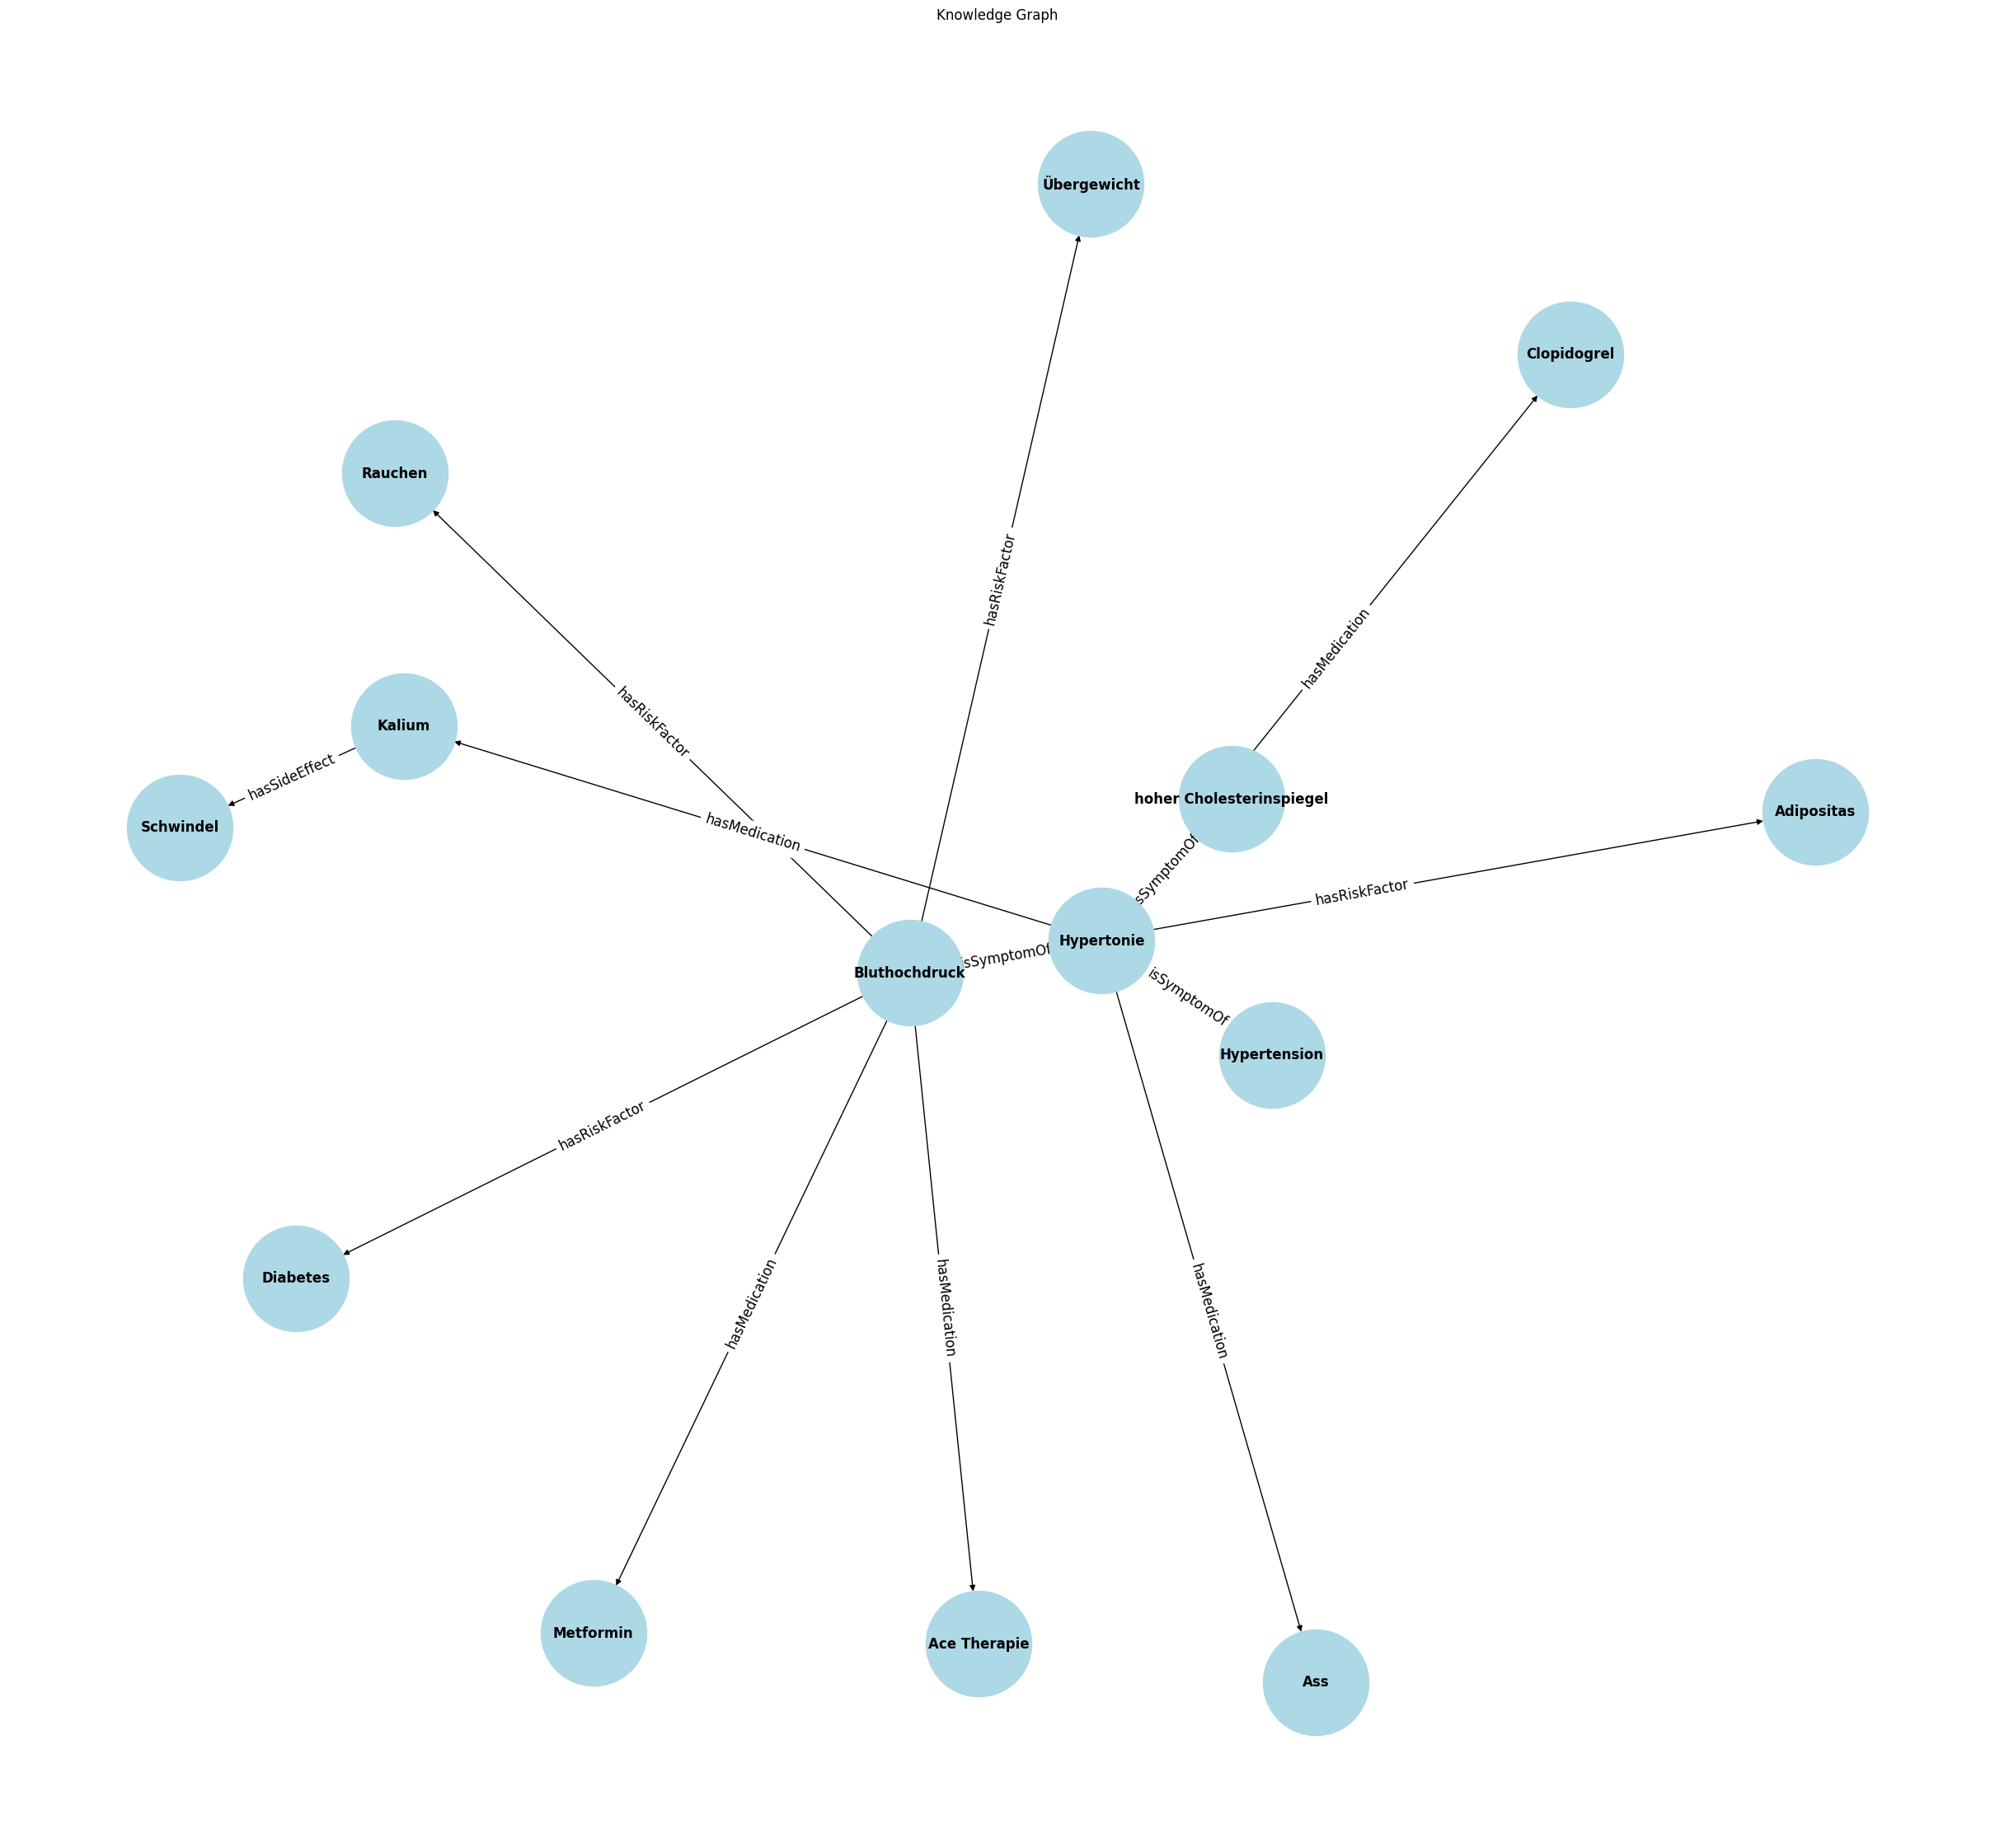

In [46]:
"""
The following code blocke visualizes a small part of the dataframe into a KG.
"""
G = nx.DiGraph()

# Add nodes from the 'sourceid' and 'destinationid' columns
G.add_nodes_from(merged_df['sourceid'], label='sourceid')
G.add_nodes_from(merged_df['destinationid'], label='destinationid')

# Add edges with 'relationship' as the relationship attribute
for _, row in merged_df.iterrows():
    G.add_edge(row['sourceid'], row['destinationid'], relationship=row['relationship'])

# Define node positions
pos = nx.spring_layout(G, k=0.5)

plt.figure(figsize=(24, 22))
# Draw the graph
labels = {node: node for node in G.nodes()}
nx.draw(G, pos, with_labels=True, labels=labels, node_size=8500, node_color='lightblue', font_size=12, font_color='black', font_weight='bold')
edge_labels = {(source, destination): relationship for source, destination, relationship in G.edges(data='relationship')}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=12)

plt.title("Knowledge Graph")
# plt.savefig('knowledge_graph_with_sizes.png', format='png', bbox_inches='tight')
plt.show()